# Networkx

In [9]:
# stuff to import
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
# create a directed graph and add nodes
DG = nx.DiGraph()
DG.add_node("rain")
DG.add_node("sprinkler")
DG.add_node("grass wet")
DG.add_node("sidewalk wet")
DG.add_node("person slipped")

In [44]:
DG.number_of_nodes()

5

In [45]:
list(DG.nodes)

['rain', 'sprinkler', 'grass wet', 'sidewalk wet', 'person slipped']

In [100]:
# add edges
edge_list = [("rain", "grass wet", 0.9), ("rain", "sidewalk wet", 0.75), ("sprinkler", "grass wet", 0.8), ("sidewalk wet", "person slipped", 0.4)]
DG.add_weighted_edges_from(edge_list)
list(DG.edges)

[('rain', 'grass wet'),
 ('rain', 'sidewalk wet'),
 ('sprinkler', 'grass wet'),
 ('sidewalk wet', 'person slipped')]

In [101]:
# neighbors list *direct* children (out-edges)
print(list(DG.neighbors("rain")))
print(list(DG.neighbors("grass wet")))

['grass wet', 'sidewalk wet']
[]


In [50]:
# see all out-edges
print(list(DG.out_edges("rain")))

[('rain', 'grass wet'), ('rain', 'sidewalk wet')]


In [52]:
# see all descendants of a node (even indirect)
nx.descendants(DG, "rain")

{'grass wet', 'person slipped', 'sidewalk wet'}

In [102]:
# see all edges in the graph
nx.edges(DG)

OutEdgeView([('rain', 'grass wet'), ('rain', 'sidewalk wet'), ('sprinkler', 'grass wet'), ('sidewalk wet', 'person slipped')])

In [54]:
# see all weights for every edge in the graph
nx.get_edge_attributes(DG, 'weight')

{('rain', 'grass wet'): 0.9,
 ('rain', 'sidewalk wet'): 0.75,
 ('sprinkler', 'grass wet'): 0.8,
 ('sidewalk wet', 'person slipped'): 0.4}

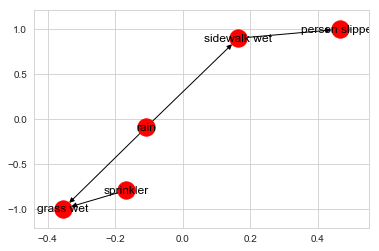

In [103]:
# draw the graph
nx.draw_networkx(DG)

## Similarity using jaccard index

In [104]:
# get all children in a dictionary including their respective weights (chains taken into account)
def get_all_children(graph, parent, children_dict={}, carry=1):
    weights = nx.get_edge_attributes(DG, 'weight')
    for i in graph.out_edges(parent):
        children_dict[i[1]] = carry*weights[i]
        get_all_children(graph, i[1], children_dict=children_dict, carry=weights[i])
    return children_dict

In [105]:
# all children of rain
print(get_all_children(DG, "rain", {}))

{'grass wet': 0.9, 'sidewalk wet': 0.75, 'person slipped': 0.30000000000000004}


In [106]:
print(get_all_children(DG, "sprinkler", {}))

{'grass wet': 0.8}


In [107]:
# helper func to calculate the intersection
def calculate_intersection(graph, children_a, children_b):
    inter = 0
    for i in children_a:
        if i in children_b:
            if children_a[i] < children_b[i]:
                inter += children_a[i]
            else:
                inter += children_b[i]
    return inter     

In [108]:
# helper func to calculate the union using method 1
def calculate_union_1(graph, children_a, children_b):
    union = 0
    for i in children_a:
        union += children_a[i]
    for i in children_b:
        union += children_b[i]
    union -= calculate_intersection(graph, children_a, children_b)
    return union

In [109]:
# helper func to calculate the union using method 1
def calculate_union_2(graph, children_a, children_b):
    union = 0
    for i in children_a:
        if i in children_b:
            union += abs(children_a[i] - children_b[i])
        else:
            union += children_a[i]
    for i in children_b:
        if not i in children_a:
            union += children_b[i]
    return union

In [110]:
# calculate the similarity, compares both methods
def calculate_similarity(graph, node_a, node_b):
    children_a = get_all_children(DG, node_a, {})
    children_b = get_all_children(DG, node_b, {})
    intersection = calculate_intersection(graph, children_a, children_b)
    union_1 = calculate_union_1(graph, children_a, children_b)
    union_2 = calculate_union_2(graph, children_a, children_b)
    print(intersection)
    print(union_1)
    print(union_2)
    results = {"method 1": intersection/union_1, "method 2": intersection/union_2}
    return results

In [111]:
calculate_similarity(DG, "rain", "sprinkler")

0.8
1.95
1.15


{'method 1': 0.4102564102564103, 'method 2': 0.6956521739130436}